### Import dataset

In [72]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv("games.csv") # Import als df, Komma als seperator
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


### Easiest evaluation: Winrates with white / black

In [73]:
df["winner"].unique()
print("White:", 100*round(df[df["winner"] == "white"].count()[0]/len(df), 3), "%")
print("Black:", 100*round(df[df["winner"] == "black"].count()[0]/len(df), 3), "%")
print("Draw:", 100*round(df[df["winner"] == "draw"].count()[0]/len(df), 3), "%")

White: 49.9 %
Black: 45.4 %
Draw: 4.7 %


Now depending on rating
- Work in Progress

Min rating: 816.5
Max rating: 2475.5


0.013909661980257254

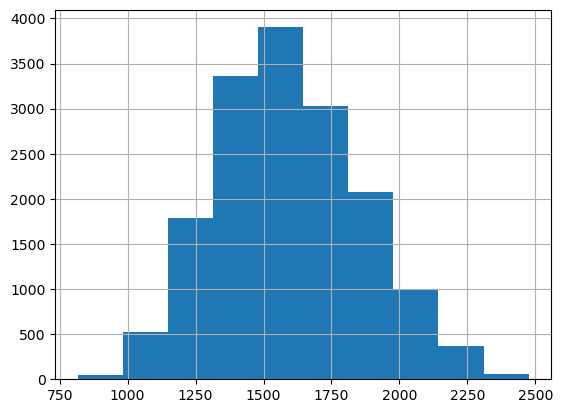

In [74]:
dfr = df[df["rated"]] # Create DF with only rated games
dfr["avg_rating"] = (dfr["white_rating"] + dfr["black_rating"])/2
dfr["avg_rating"].hist()
print("Min rating:", dfr["avg_rating"].min())
print("Max rating:", dfr["avg_rating"].max())
cont = (dfr["avg_rating"].max() - dfr["avg_rating"].min())/5
dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + cont][dfr["winner"] == "white"].count()[0]/len(df)

In [75]:
for i in range(1,6): 
     print(dfr["avg_rating"].min() + (i-1)*cont, "to", dfr["avg_rating"].min() + i*cont, "White:", dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont][dfr["winner"] == "white"].count()[0]/len(dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont]))
     print(dfr["avg_rating"].min() + (i-1)*cont, "to", dfr["avg_rating"].min() + i*cont, "Black:", dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont][dfr["winner"] == "black"].count()[0]/len(dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont]))
     print(dfr["avg_rating"].min() + (i-1)*cont, "to", dfr["avg_rating"].min() + i*cont, "Draw:", dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont][dfr["winner"] == "draw"].count()[0]/len(dfr[dfr["avg_rating"] < dfr["avg_rating"].min() + i*cont]))


816.5 to 1148.3 White: 0.4826989619377163
816.5 to 1148.3 Black: 0.47058823529411764
816.5 to 1148.3 Draw: 0.04671280276816609
1148.3 to 1480.1 White: 0.5104748603351955
1148.3 to 1480.1 Black: 0.45006983240223464
1148.3 to 1480.1 Draw: 0.03945530726256983
1480.1 to 1811.9 White: 0.5026851998104565
1480.1 to 1811.9 Black: 0.4566419207076291
1480.1 to 1811.9 Draw: 0.04067287948191439
1811.9 to 2143.7 White: 0.49952335557673977
1811.9 to 2143.7 Black: 0.45764219891960595
1811.9 to 2143.7 Draw: 0.04283444550365428
2143.7 to 2475.5 White: 0.4984523956914696
2143.7 to 2475.5 Black: 0.4571004085675375
2143.7 to 2475.5 Draw: 0.04444719574099294
